In [1]:
!pip install prophet --quiet

In [2]:
!pip install --upgrade pandas-datareader --quiet

In [3]:
!pip install --upgrade pandas --quiet

### Data Science with Cryptocurrencies
---

Analysis of past returns and building a prediction model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as reader
import seaborn as sns

%matplotlib inline

### Get online cryptocurrency prices
---
Exclude Stablecoins and Forks

In [5]:
end_date = dt.datetime.now()
# Go four years back from today
start_date = dt.date(end_date.year - 4, end_date.month, end_date.day)

In [6]:
crypto_list = ['BTC-USD','ETH-USD','XRP-USD','LTC-USD']

In [7]:
df  = reader.get_data_yahoo(crypto_list, start_date, end_date)['Adj Close']
df

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-08-03,7434.390137,418.261993,0.440571,77.535500
2018-08-04,7032.850098,407.252014,0.428507,73.198700
2018-08-05,7068.479980,410.515991,0.433638,74.589401
2018-08-06,6951.799805,406.657990,0.414081,73.888298
2018-08-07,6753.120117,380.214996,0.381006,68.170303
...,...,...,...,...
2022-07-30,23656.207031,1695.969482,0.387764,60.440151
2022-07-31,23336.896484,1681.517334,0.380458,59.909508
2022-08-01,23314.199219,1635.195801,0.379976,59.535446


### Add some plotting
---

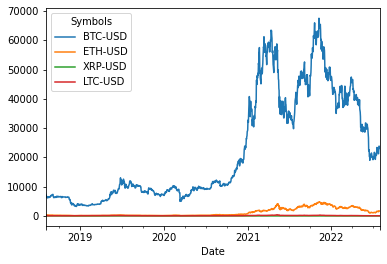

In [8]:
# These plots are misleading since they don't count for scale or relative price changes
df.plot()
plt.show()

### To compare cryptos, we have to work with returns and not absolute prices
---

In [9]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-08-04,-0.054011,-0.026323,-0.027383,-0.055933
2018-08-05,0.005066,0.008015,0.011974,0.018999
2018-08-06,-0.016507,-0.009398,-0.045100,-0.009400
2018-08-07,-0.028580,-0.065025,-0.079876,-0.077387
2018-08-08,-0.066239,-0.062075,-0.128770,-0.083319
...,...,...,...,...
2022-07-30,-0.006235,-0.018199,0.051777,-0.007917
2022-07-31,-0.013498,-0.008521,-0.018841,-0.008780
2022-08-01,-0.000973,-0.027547,-0.001267,-0.006244


### Calculate cumulative returns to make cryptos comparable
---

In [10]:
daily_cum_returns = (daily_returns + 1).cumprod() -1
daily_cum_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-08-04,-0.054011,-0.026323,-0.027383,-0.055933
2018-08-05,-0.049219,-0.018519,-0.015736,-0.037997
2018-08-06,-0.064913,-0.027743,-0.060127,-0.047039
2018-08-07,-0.091638,-0.090965,-0.135200,-0.120786
2018-08-08,-0.151807,-0.147393,-0.246560,-0.194041
...,...,...,...,...
2022-07-30,2.181997,3.054802,-0.119860,-0.220484
2022-07-31,2.139047,3.020249,-0.136443,-0.227328
2022-08-01,2.135994,2.909501,-0.137537,-0.232152


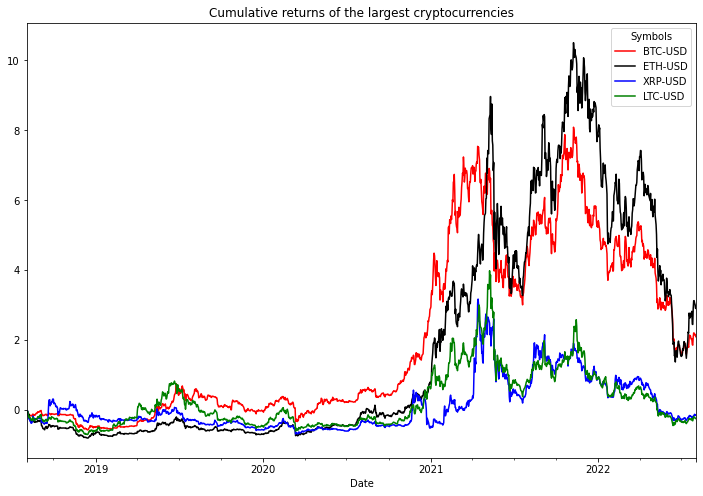

In [11]:
colors = ['r','k','b','g']
daily_cum_returns.plot(color=colors,figsize=(12,8))
plt.title("Cumulative returns of the largest cryptocurrencies")
plt.show()


### Cryptocurrency price charts over the past 4 years
---

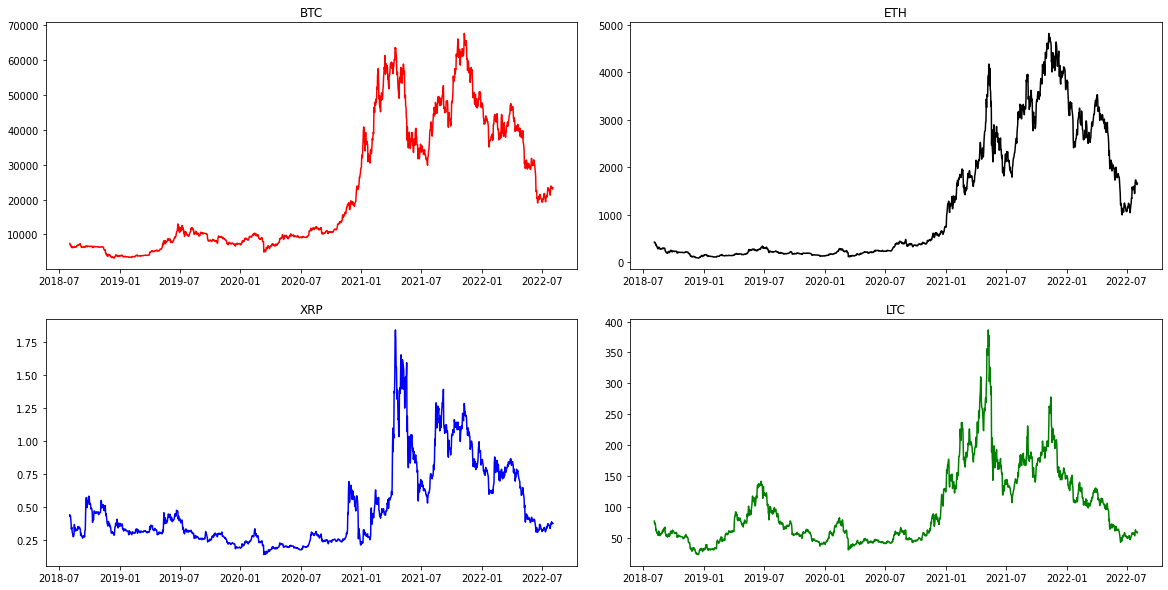

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.1})

axs[0,0].plot(df["BTC-USD"], c='r')
axs[0,0].set_title("BTC")
axs[0,1].plot(df["ETH-USD"], c='k')
axs[0,1].set_title("ETH")
axs[1,0].plot(df["XRP-USD"], c='b')
axs[1,0].set_title("XRP")
axs[1,1].plot(df["LTC-USD"], c='g')
axs[1,1].set_title("LTC")
plt.show()

### Comparison of Daily Volatilies
---

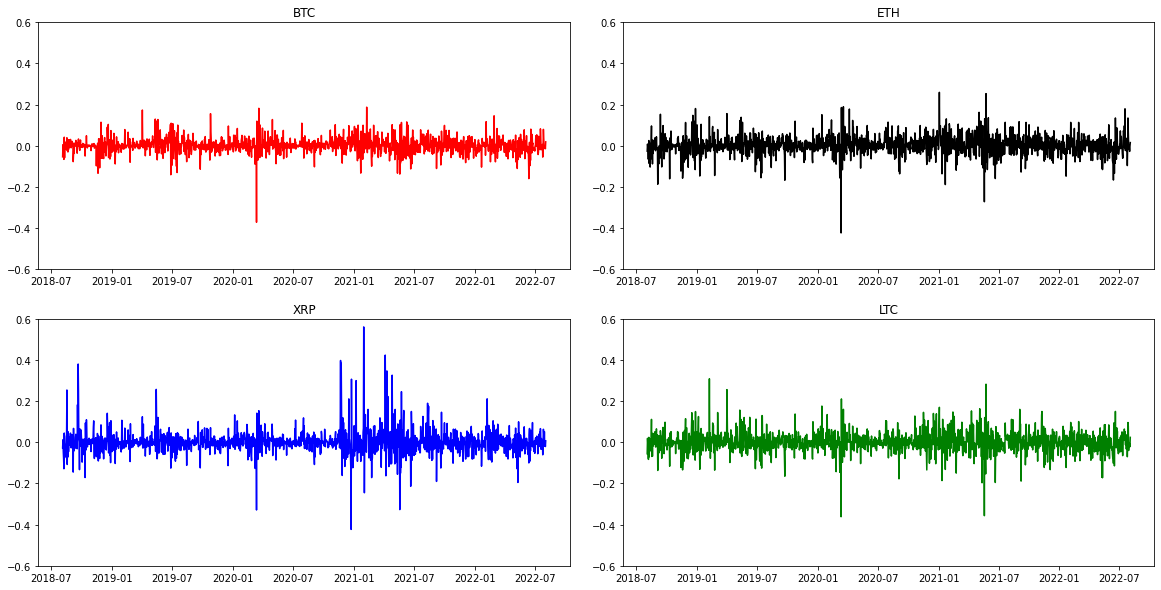

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.1})

axs[0,0].plot(daily_returns["BTC-USD"], c='r')
axs[0,0].set_title("BTC")
axs[0,0].set_ylim([-0.6, 0.6])
axs[0,1].plot(daily_returns["ETH-USD"], c='k')
axs[0,1].set_title("ETH")
axs[0,1].set_ylim([-0.6, 0.6])
axs[1,0].plot(daily_returns["XRP-USD"], c='b')
axs[1,0].set_title("XRP")
axs[1,0].set_ylim([-0.6, 0.6])
axs[1,1].plot(daily_returns["LTC-USD"], c='g')
axs[1,1].set_title("LTC")
axs[1,1].set_ylim([-0.6, 0.6])
plt.show()

### How are returns distributed?
---

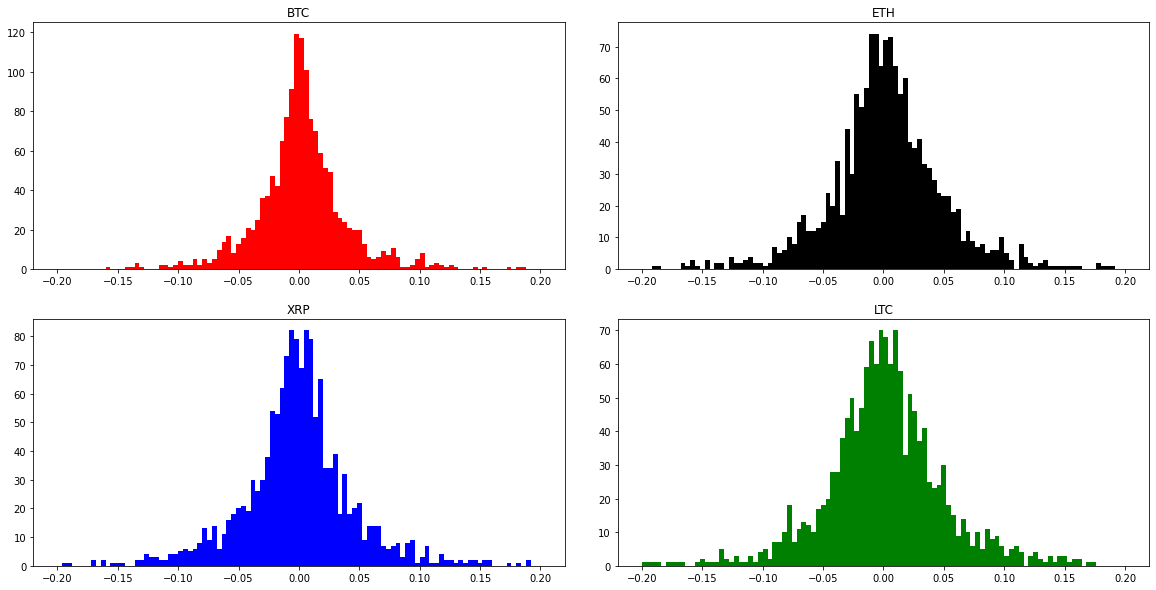

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'hspace': 0.2, 'wspace':0.1})

axs[0,0].hist(daily_returns["BTC-USD"], bins=100, color='r', range=(-0.2, 0.2))
axs[0,0].set_title("BTC")
axs[0,1].hist(daily_returns["ETH-USD"], bins=100, color='k', range=(-0.2, 0.2))
axs[0,1].set_title("ETH")
axs[1,0].hist(daily_returns["XRP-USD"], bins=100, color='b', range=(-0.2, 0.2))
axs[1,0].set_title("XRP")
axs[1,1].hist(daily_returns["LTC-USD"], bins=100, color='g', range=(-0.2, 0.2))
axs[1,1].set_title("LTC")
plt.show()

### View Extreme returns (Outliers)
---

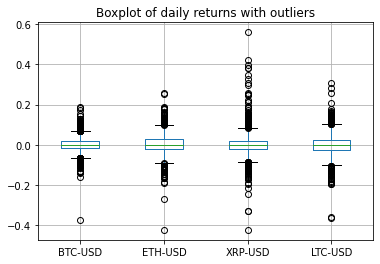

In [15]:
daily_returns.boxplot()
plt.title("Boxplot of daily returns with outliers")
plt.show()

### View returns without outliers
---

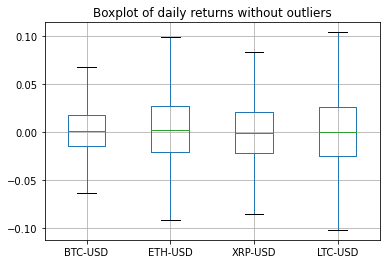

In [16]:
daily_returns.boxplot(showfliers=False)
plt.title("Boxplot of daily returns without outliers")
plt.show()

### Correlations of Cryptocurrency Returns
---

In [17]:
daily_returns.corr()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Symbols,,,,
BTC-USD,1.000000,0.815652,0.581998,0.796683
ETH-USD,0.815652,1.000000,0.644275,0.828000
XRP-USD,0.581998,0.644275,1.000000,0.657794
LTC-USD,0.796683,0.828000,0.657794,1.000000


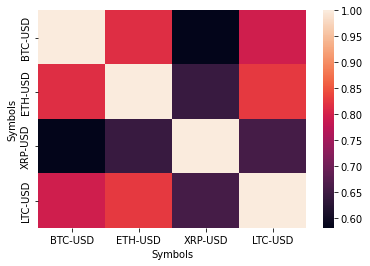

In [18]:
sns.heatmap(daily_returns.corr())
plt.show()

### Let us backtest a forecasting module with Bitcoin
---
Travel back in time and see how a prediction would have performed

In [19]:
from prophet import Prophet
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [21]:
# 1 year back
end1 = dt.date(end_date.year - 1, end_date.month, end_date.day)
print("One Year Ago: ", end1)
# 6 months back
end2 = dt.date(end_date.year-1, end_date.month-6, end_date.day)
print("Six Months Ago: ", end2)
# Three years ago
start1 = dt.date(end1.year - 3, end_date.month, end_date.day)

One Year Ago:  2021-08-03
Six Months Ago:  2021-02-03


In [22]:
df1 = reader.get_data_yahoo(crypto_list, start1, end1)['Adj Close']
df2 = reader.get_data_yahoo(crypto_list, start1, end2)['Adj Close']

In [23]:
df1.head()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2018-08-03,7434.390137,418.261993,0.440571,77.535500
2018-08-04,7032.850098,407.252014,0.428507,73.198700
2018-08-05,7068.479980,410.515991,0.433638,74.589401
2018-08-06,6951.799805,406.657990,0.414081,73.888298
2018-08-07,6753.120117,380.214996,0.381006,68.170303


In [24]:
df1 = df1.reset_index()
df1

Symbols,Date,BTC-USD,ETH-USD,XRP-USD,LTC-USD
0,2018-08-03,7434.390137,418.261993,0.440571,77.535500
1,2018-08-04,7032.850098,407.252014,0.428507,73.198700
2,2018-08-05,7068.479980,410.515991,0.433638,74.589401
3,2018-08-06,6951.799805,406.657990,0.414081,73.888298
4,2018-08-07,6753.120117,380.214996,0.381006,68.170303
...,...,...,...,...,...
1093,2021-07-31,41626.195312,2536.209961,0.747786,144.933212
1094,2021-08-01,39974.894531,2561.852051,0.725922,140.735535
1095,2021-08-02,39201.945312,2610.153320,0.739220,141.505508
1096,2021-08-03,38152.980469,2502.349609,0.712729,138.290848


In [25]:
df1[['ds', 'y']] = df1[['Date', 'BTC-USD']]
df1

Symbols,Date,BTC-USD,ETH-USD,XRP-USD,LTC-USD,ds,y
0,2018-08-03,7434.390137,418.261993,0.440571,77.535500,2018-08-03,7434.390137
1,2018-08-04,7032.850098,407.252014,0.428507,73.198700,2018-08-04,7032.850098
2,2018-08-05,7068.479980,410.515991,0.433638,74.589401,2018-08-05,7068.479980
3,2018-08-06,6951.799805,406.657990,0.414081,73.888298,2018-08-06,6951.799805
4,2018-08-07,6753.120117,380.214996,0.381006,68.170303,2018-08-07,6753.120117
...,...,...,...,...,...,...,...
1093,2021-07-31,41626.195312,2536.209961,0.747786,144.933212,2021-07-31,41626.195312
1094,2021-08-01,39974.894531,2561.852051,0.725922,140.735535,2021-08-01,39974.894531
1095,2021-08-02,39201.945312,2610.153320,0.739220,141.505508,2021-08-02,39201.945312
1096,2021-08-03,38152.980469,2502.349609,0.712729,138.290848,2021-08-03,38152.980469


In [26]:
modelfb1 = Prophet()

In [27]:
modelfb1.fit(df1)

18:27:32 - cmdstanpy - INFO - Chain [1] start processing
18:27:32 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
modelfb2 = Prophet()
df2 = df2.reset_index()
df2[['ds','y']] = df2[['Date','BTC-USD']]
modelfb2.fit(df2)

18:27:32 - cmdstanpy - INFO - Chain [1] start processing
18:27:33 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future1 = modelfb1.make_future_dataframe(periods=365)
future2 = modelfb2.make_future_dataframe(periods=180)

In [30]:
forecast1 = modelfb1.predict(future1)
forecast2 = modelfb2.predict(future2)

#### The 1 year prediction of BTC Price
---

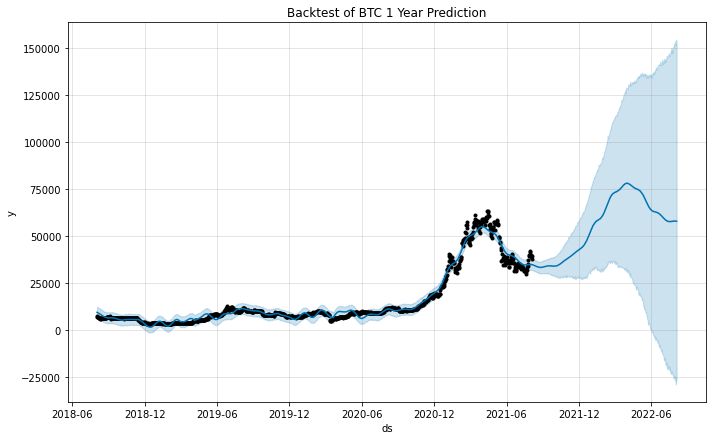

In [31]:
modelfb1.plot(forecast1)
plt.title("Backtest of BTC 1 Year Prediction")
plt.show()

#### The 6 month prediction of BTC Price
---

Backtest Looks more reasonable

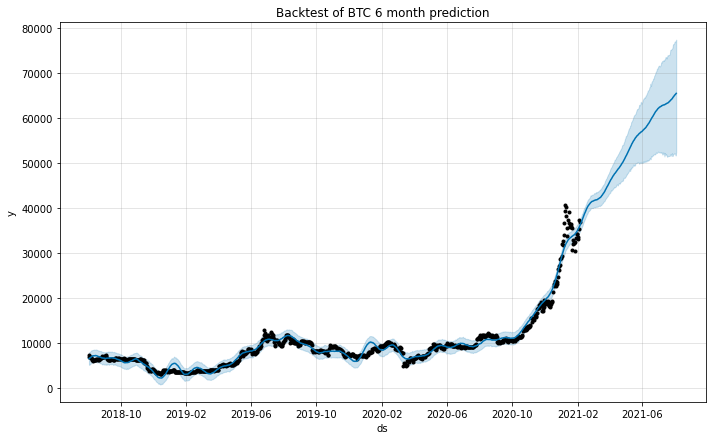

In [32]:
modelfb2.plot(forecast2)
plt.title("Backtest of BTC 6 month prediction")
plt.show()

### Where will Bitcoin be six months from now?
---

In [33]:
modelfb3 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'BTC-USD']]
modelfb3.fit(df)

18:27:40 - cmdstanpy - INFO - Chain [1] start processing
18:27:41 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future3 = modelfb3.make_future_dataframe(periods=180)

In [35]:
forecast3 = modelfb3.predict(future3)

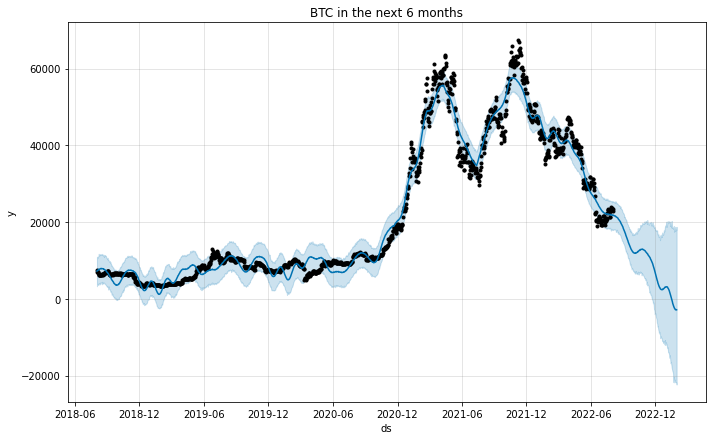

In [36]:
modelfb3.plot(forecast3)
plt.title("BTC in the next 6 months")
plt.show()

#### Do Cryptocurrency returns explain each other?
---

In [37]:
import statsmodels.api as sm

In [38]:
y = daily_returns['BTC-USD']
X1 = daily_returns[['ETH-USD']]
X2 = daily_returns[['ETH-USD','XRP-USD']]
X3 = daily_returns[['ETH-USD','XRP-USD','LTC-USD']]

X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

In [39]:
model1 = sm.OLS(y, X1)
model2 = sm.OLS(y, X2)
model3 = sm.OLS(y, X3)

results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()

In [40]:
results1.rsquared

0.6652887975477071

In [41]:
results2.rsquared

0.6707451186250613

In [42]:
results3.rsquared

0.7122386694447649